# DSCI 100 Project: Predicting Minecraft Player Subscription Using Age and Played Hours

**Name:** Andrew Ip

**Date:** June 22, 2025

**Section:** DSCI 100 Section 003

In [1]:
## Run this cell before continuing.

library(tidyverse)
library(tidymodels)
library(repr)
set.seed(1)  # We will set the seed once here so our results are reproducible

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

**Background:** 
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

**Question:** 

*Can the players' ages and hours played be used to predict whether they have a game newsletter subscription in the Minecraft server data?*

**Data Description:** identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need. 

## Methods and Results

### Reading, Cleaning, and Visualizing Data

First, load the data set using a URL to the file stored in the GitHub repository. The `players.csv` file will be used for analysis.

In [2]:
url <- "https://raw.githubusercontent.com/andrew11i/AI-dsci-100-project-2025ss/refs/heads/main/players.csv"

players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Next, we will use the `as_factor` function to change the `subscribe` column from logical to factor type. We will also use `fct_recode` to rename "TRUE" as "Subscribed" and "FALSE" as "Not Subscribed". We will also select only the columns we are intersted in.

In [3]:
players_clean <- players |>
  mutate(subscribe = as_factor(subscribe)) |>
  mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE")) |>
  select(subscribe, played_hours, Age)
head(players_clean)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
Subscribed,30.3,9
Subscribed,3.8,17
Not Subscribed,0.0,17
Subscribed,0.7,21
Subscribed,0.1,21
Subscribed,0.0,17


The data is now modified and we can work with it. This cleaned dataset now only contains 3 columns we are interested in. Now, we will perform summary analysis on these columns to obtain the maximum, average, and minimum values.

In [4]:
summarize(players_clean, 
          max_hours = max(played_hours),
          mean_hours = mean(played_hours),
          min_hours = min(played_hours),
          max_age = max(Age, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE),
          min_age = min(Age, na.rm = TRUE),
         )

max_hours,mean_hours,min_hours,max_age,mean_age,min_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
223.1,5.845918,0,50,20.52062,8


Next, we will create some visualizations to study the relationships between age, played_hours, and subscription. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


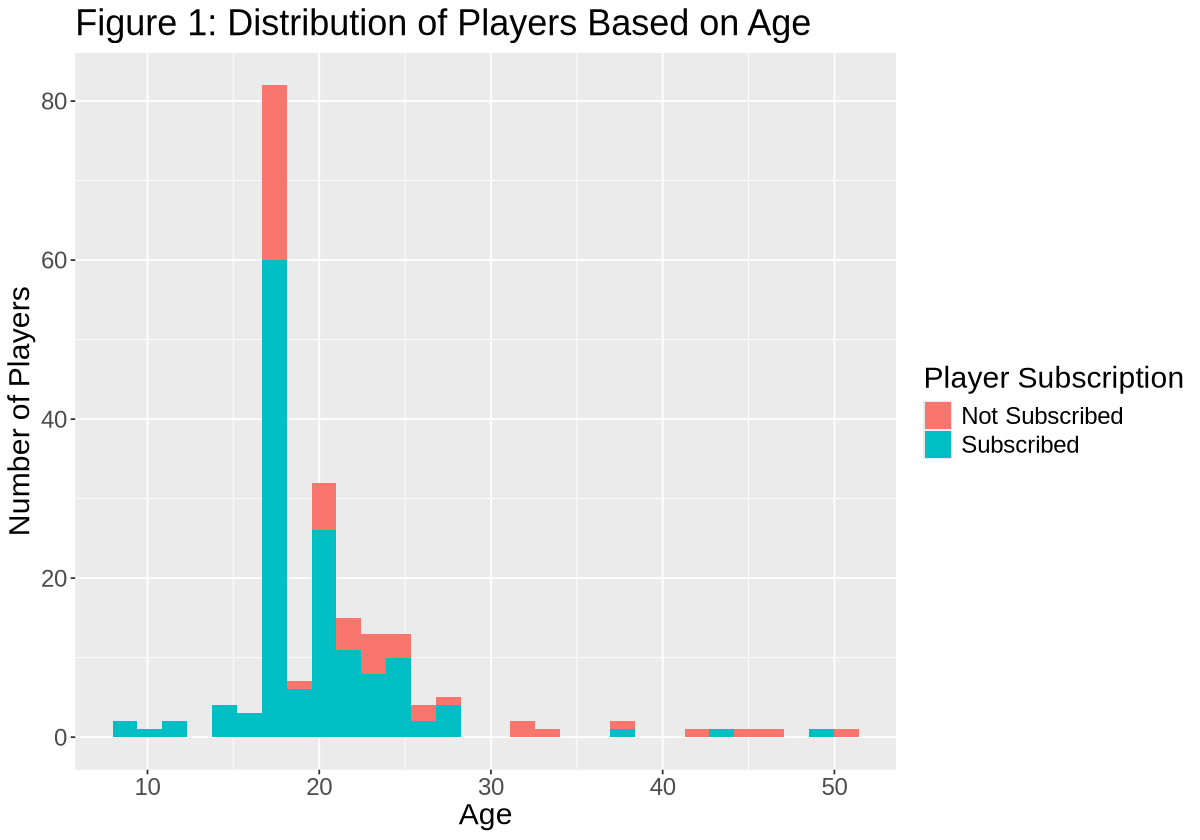

In [5]:
options(repr.plot.width = 10)

## This histogram shows the distribution of age and is coloured based on subscription

ggplot(players_clean, aes(x = Age, fill = subscribe)) +
  geom_histogram() +
  labs(x = "Age", y = "Number of Players", fill = "Player Subscription") +
  ggtitle("Figure 1: Distribution of Players Based on Age") +
  theme(text = element_text(size = 18))

**Explanation:** In most age group, there are players who are subscribed. Based on age alone, it may be difficult to predict subscription.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


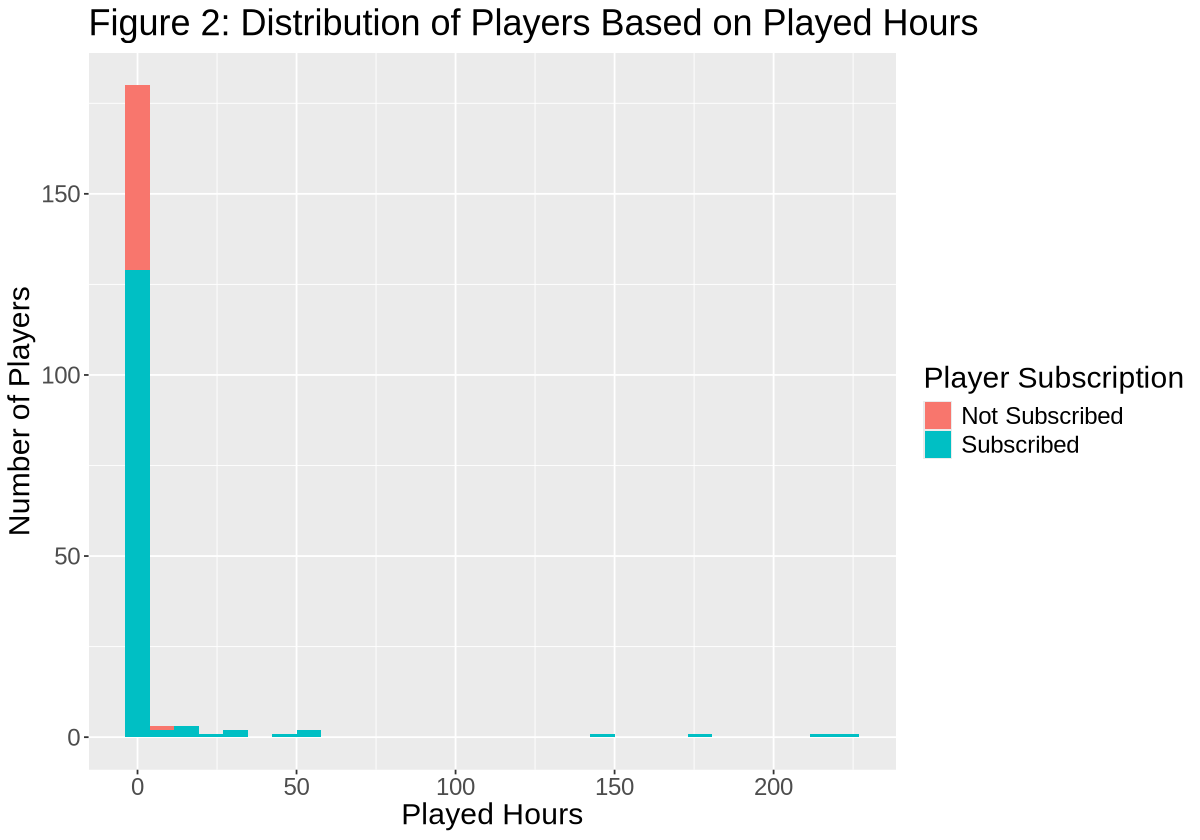

In [6]:
## This histogram shows the distribution of played hours and is coloured based on subscription

ggplot(players_clean, aes(x = played_hours, fill = subscribe)) +
  geom_histogram() +
  labs(x = "Played Hours", y = "Number of Players", fill = "Player Subscription") +
  ggtitle("Figure 2: Distribution of Players Based on Played Hours") +
  theme(text = element_text(size = 18))

**Explanation:** Most players who have played more than 25 hours are all subscribed. However, about 30% of the players who played less than 25 hours are subscribed. Thus, we can expect players who have played more than 25 hours to be subscribed.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


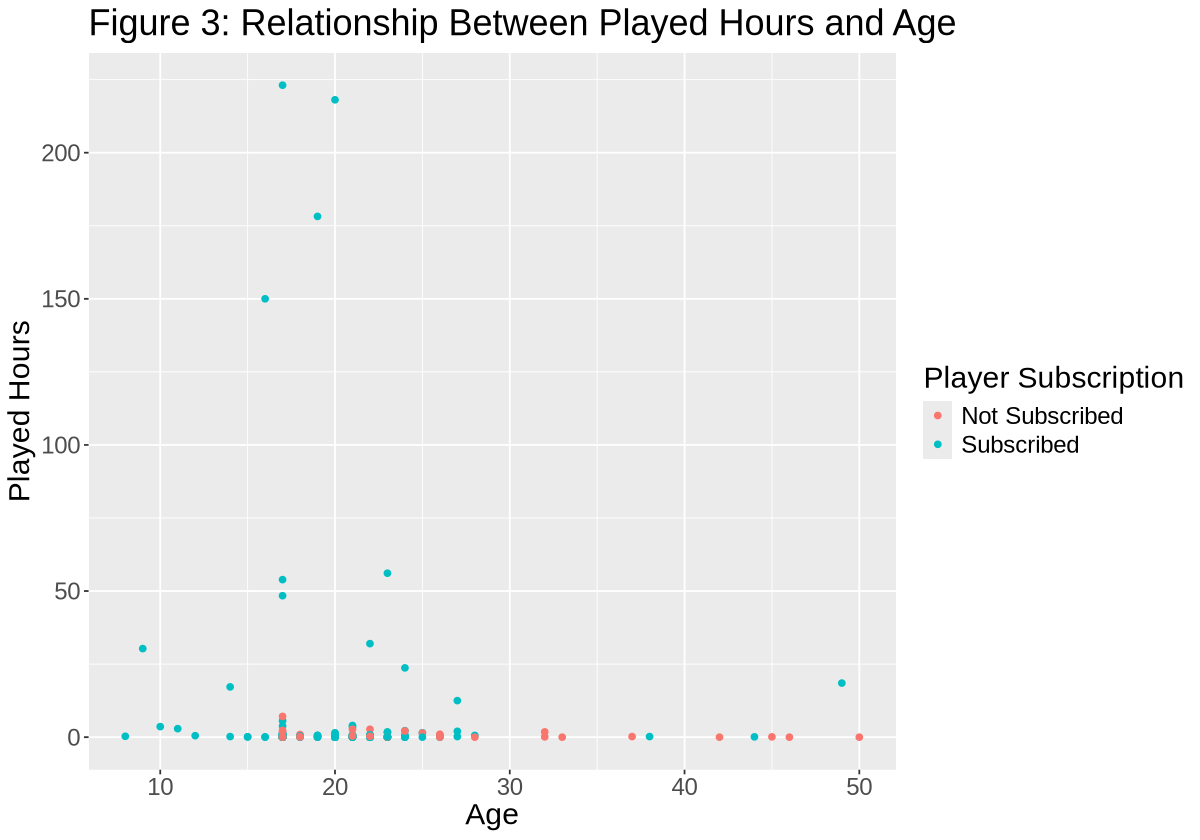

In [7]:
## This scatter plot shows the relationship between age and played hours

ggplot(players_clean, aes(x = Age, y = played_hours, colour = subscribe)) +
  geom_point() +
  labs(x = "Age", y = "Played Hours", colour = "Player Subscription") +
  ggtitle("Figure 3: Relationship Between Played Hours and Age") +
  theme(text = element_text(size = 18))

**Explanation:** This scatter plot shows that there is not a clear relationship between age and played hours. The points seem to be scattered and no visble trend can be identified.

### Analyzing Data

Now, we will begin analyzing the data using a K-nearest neighbor classification model. This method is appropriate for this analysis because our response variable, `subscribe`, is a factor, and it can be predicted using the classification method. 

A limitation of using a K-nearest neighbor classification model is that the prediction may not be very accurate as the class seems to be imbalanced. As we saw in Figure 2, all players who have played more than 25 hours are all subscribed. Also, in Figure 3, we can see that for ages between 15 and 25, the points are all clustered. This can affect the accuracy of the prediction diffult as K-nearest neighbour depends on distance, but all of those clustered points are so closed to each other.

To train and evaluate our model, we will begin by splitting the data. We will use 75% of our data as the training set and the remaining 25% as our testing set.

In [8]:
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

We begin our analysis with 5 neighbors, and we will tune our model using 5-fold cross-validation. 

In [9]:
## Create the model specification with 5 neighbors

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

## Create the recipe to predict subscription using age and played hour
## We will also scale and center all the predictors

train_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

## Perform 5-fold cross-validation
    
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe) 

## Put everything together in a workflow 

train_fit <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(players_spec) |>
  fit_resamples(resamples = players_vfold)

## Use collect_metrics to

collect_metrics(train_fit) |>
  filter(.metric == "accuracy")

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6111111,3,0.08012336,Preprocessor1_Model1


This shows us that the predicted accuracy is about $61\%$.

The accuracy suggested above is relatively low, so we will tune and compare different $K$ values and see which one might give us a higher accuracy. 

In [10]:
## Create the model specification to tune the model

tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification") 

## We will test K values from 5 to 50, in increments of 5

players_grid <- tibble(neighbors = seq(from = 5, to = 50, by = 5))

## Put everything in a workflow, collect metrics, and filter to show only the accuracy

tune_results <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(tune_spec) |>
  tune_grid(resamples = players_vfold, grid = players_grid) |>
  collect_metrics() |>
  filter(.metric == "accuracy") 
tune_results

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,accuracy,binary,0.6111111,3,0.080123362,Preprocessor1_Model01
10,accuracy,binary,0.6341270,3,0.099605546,Preprocessor1_Model02
15,accuracy,binary,0.7174603,3,0.075509523,Preprocessor1_Model03
20,accuracy,binary,0.7619048,3,0.015307382,Preprocessor1_Model04
25,accuracy,binary,0.7507937,3,0.017460317,Preprocessor1_Model05
30,accuracy,binary,0.7507937,3,0.017460317,Preprocessor1_Model06
35,accuracy,binary,0.7507937,3,0.017460317,Preprocessor1_Model07
40,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model08
45,accuracy,binary,0.7388889,3,0.005555556,Preprocessor1_Model09


Let's plot the results above to visualize which $K$ value will give us the highest accuracy.

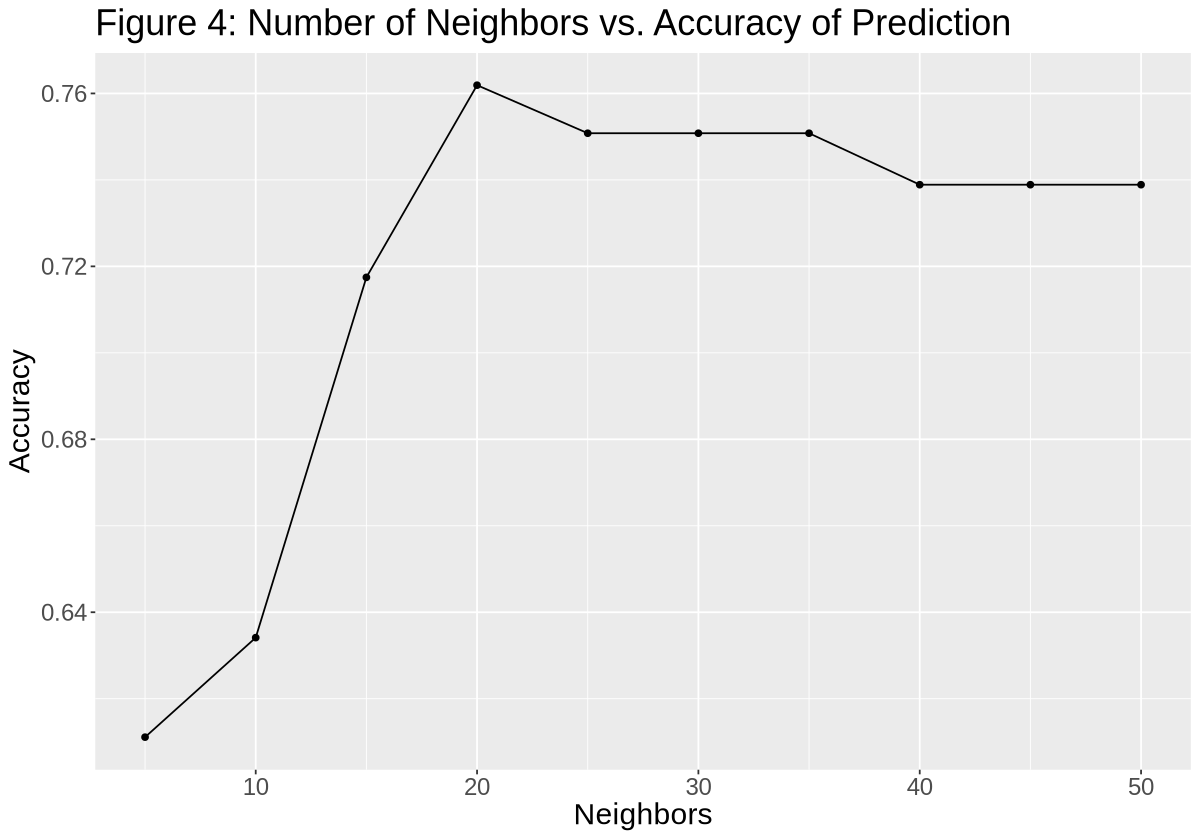

In [11]:
ggplot(tune_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy") +
  ggtitle("Figure 4: Number of Neighbors vs. Accuracy of Prediction") +
  theme(text = element_text(size = 18))

The $K$ value that gives the highest accuracy is $K = 20$. We are now able to retrain our model using this information.

In [12]:
## Create the model specification with K = 20

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |>
  set_engine("kknn") |>
  set_mode("classification") 

## Put everything in a workflow

train_best_fit <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(best_spec) |>
  fit(data = players_train)

## Test our model using the testing set

players_best_predictions <- predict(train_best_fit, players_test) |>
  bind_cols(players_test)

Let's see the accuracy of the model.

In [13]:
players_best_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857


We see that the accuracy is $71\%$. Let's also see the confusion matrix for the predictions.

In [14]:
players_best_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)

                Truth
Prediction       Not Subscribed Subscribed
  Not Subscribed              0          1
  Subscribed                 13         35

We can also get the precision and recall of the model.

In [15]:
players_best_predictions |> 
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")

players_best_predictions |> 
  recall(truth = subscribe, estimate = .pred_class, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7291667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9722222


The precision is $73\%$ and the recall is $97\%$.

## Discussion

summarize what you found 

discuss whether this is what you expected to find?

discuss what impact could such findings have?

discuss what future questions could this lead to?